# 3 Data integration in a single matrix (Control+Infected)
#### Dataset1+Dataset2 (Arabidopsis Col-0 + Arabidopsis Infected)

Cynthia Soto <br>
Fecha: 5 de Octubre 2020 <br>
Datatype representation: normalized values in log2 scale (genome name reference) <br>
Data quantify with HTSeq (alignments done with STAR SA)  <br>

In this point: <br>
Datasets are ready (transformed to a log2 scale). <br>
Distributions are known. <br>
Genes with ceros across all samples by dataset are also known.  <br>

**Workflow:** <br>
1) Merge dataset1 and dataset2 (20 xtromes) <br>
2) Plot the distributions.  <br> 
3) Remove genes with ceros across all samples.  <br>
4) Plot the new distributions.  <br>

In [1]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'             

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis


### Datasets are going to be load in df
<br>
First, let's to validate ceros across samples by dataset<br>
<br>
**Files to merge:** <br>
athal1_htseq-counts/all_samples_log2.csv<br>
athal2_htseq-counts/all_samples_log2.csv

In [3]:
# Import Data (example with 2 cvs files)
df1=pd.read_csv("athal1_htseq-counts/all_samples_log2.csv", sep='\t')  #,nrows=100 , usecols=[1,3]
print(df1.shape)
## remove unnamed cols
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
print(df1.columns)
df1.head(5)

(27655, 10)
Index(['Genes', 'SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145',
       'SRR3383641', 'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')


,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783


In [4]:
#Check number of zeros by sample
df1.isin([0]).sum()

Genes            0
SRR3383640    7396
SRR3383821    7360
SRR3383782    6888
SRR6283145    7688
SRR3383641    7039
SRR3383783    7627
SRR3383822    7702
SRR6283144    7700
dtype: int64

In [5]:
## Import Data 
df2=pd.read_csv("athal2_htseq-counts/all_samples_log2.csv", sep='\t')
print(df2.shape)
## Removes unnamed cols
df2.drop(df2.columns[df2.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
df2.head(5)

(27655, 14)


,Genes,SRR364399,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
0,AT1G01010,6.930737,3.000000,5.614710,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515
1,AT1G01020,6.727920,5.129283,5.357552,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196
2,AT1G01030,3.584963,4.459432,5.087463,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432
3,AT1G01040,9.262095,6.228819,5.857981,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781
4,AT1G01050,7.954196,4.700440,4.247928,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808


Use numpy.where(condition, x, y) with condition as a boolean expression comparing two columns. For each row of the two columns, the corresponding element of the resulting NumPy array is x if condition is True, and y otherwise.

In [6]:
## Look if different gene_names exist in the files (df)
comparison_column = np.where(df1["Genes"] == df2["Genes"], True, False)
print (comparison_column)
## If True all gene_names are equal, otherwise result is False

[ True  True  True ...  True  True  True]


In [7]:
## Look for 'False' bool in the comparison, if found means something is different. 
## A "False" means all are true (equal)
False in comparison_column

False

In [8]:
df1=df1.merge(df2,on=['Genes'],how='left')
df1

,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,SRR364399,...,SRR6283147,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,6.930737,...,5.614710,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,6.727920,...,5.357552,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,3.584963,...,5.087463,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,9.262095,...,5.857981,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,7.954196,...,4.247928,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27650,ATMG01350,1.000000,1.584963,0.000000,3.000000,1.584963,1.000000,0.000000,3.169925,4.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.584963,1.584963,2.807355,3.459432
27651,ATMG01360,4.392317,4.807355,5.700440,6.554589,6.247928,4.807355,4.523562,6.392317,8.778077,...,5.584963,5.247928,5.087463,4.321928,4.000000,4.643856,5.044394,7.238405,7.507795,8.661778
27652,ATMG01370,4.643856,5.129283,5.321928,5.832890,6.228819,4.169925,4.321928,4.321928,7.714246,...,2.000000,4.857981,5.044394,4.954196,4.754888,4.087463,4.954196,7.285402,7.118941,7.700440
27653,ATMG01400,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.807355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000


In [9]:
# Save the stats
df_stat=df1.describe()
df_stat.T.to_csv('all_log2_stats.csv', sep='\t', index=True)

## Some statistic onto the new matrix

1) GeneID with cero counts across all the samples are track it<br>
2) Then, GeneIDs that match the query are removed from the matrix (df1) to compose a new dataset. <br>

**Features with ceros are tracked & removed**

int64
Genes                0
SRR3383640        7396
SRR3383821        7360
SRR3383782        6888
SRR6283145        7688
SRR3383641        7039
SRR3383783        7627
SRR3383822        7702
SRR6283144        7700
SRR364399         7090
SRR6283148       10866
SRR6283147       10600
SRR3383696        7518
SRR3383780        7549
SRR10586397pe     5627
SRR10586399pe     5703
SRR3383779        7719
SRR3383697        7375
SRR364390         7229
SRR364389         7164
SRR364398         7117
dtype: int64
[7396, 7360, 6888, 7688, 7039, 7627, 7702, 7700, 7090, 10866, 10600, 7518, 7549, 5627, 5703, 7719, 7375, 7229, 7164, 7117]


Text(0, 0.5, '# of samples')

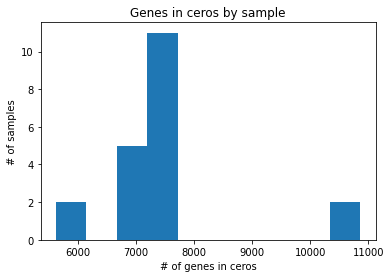

In [53]:
#Check number of zeros by sample
zeros=df1.isin([0]).sum()
print(zeros.dtype)
print(zeros)

lst_ceros=zeros.values
lst_ceros=list(lst_ceros)
lst_ceros.remove(0)
print(lst_ceros)

plt.hist(lst_ceros)  #df1.isin([0]).sum()
plt.title("Genes in ceros by sample")
plt.xlabel("# of genes in ceros")
plt.ylabel("# of samples")
#plt.legend('samples')

In [54]:
## Add meta-data labels (pending-jump)

#Check number of zeros by sample
ceros_counter= df1.isin([0]).sum()
print(ceros_counter.dtype)
ceros_counter
ceros_counter['SRR3383640']
ceros_counter=ceros_counter[1:]
ceros_counter

print(str(os.getcwd()))
lst_header=["sample","fungus","hpi","ID_sample","good"] 
file='~/Proyectos/athal2_stats/metadata.csv'
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
#print(df_meta)

int64
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis


In [55]:
s_zeros=(df1 == 0).astype(int).sum(axis=1)
print(s_zeros)
#type(s_zeros)    ### build a serie-pandas
## Desglozando la formula
#(df1 == 0)
#(df1 == 0).astype(int)
#(df1 == 0).sum(axis=1)
## Added a column to df1 with the counter of zeros
df1['zero-counter'] = s_zeros
df1
## Send the integrated matrix to all_log2_counter_cero.csv 
df1.to_csv('all_d1d2_counter_cero.csv', sep='\t', index=True)

0         0
1         0
2         0
3         0
4         0
         ..
27650     5
27651     0
27652     0
27653    14
27654     1
Length: 27655, dtype: int64


**Now all_d1d2_counter_cero.csv contains D1 + D2 with counter of ceros plus in the last column** <br>
And, **all_log2_21_ceros.csv** contains the geneIDs with ceros (code below)
                                                                                                    

In [56]:
## Filter: looking rows with x number of ceros
is_zero = (df1['zero-counter']==20)     
df1_20 = df1[is_zero]
print(df1_20.shape)
print(df1_20.head(7))
## Send the integrated matrix to all_log2_counter_cero.csv 
df1_20.to_csv('all_log2_20_ceros.csv', sep='\t', index=True)

(3329, 22)
         Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  \
33   AT1G01335         0.0         0.0         0.0         0.0         0.0   
42   AT1G01410         0.0         0.0         0.0         0.0         0.0   
110  AT1G02067         0.0         0.0         0.0         0.0         0.0   
126  AT1G02210         0.0         0.0         0.0         0.0         0.0   
161  AT1G02540         0.0         0.0         0.0         0.0         0.0   
162  AT1G02550         0.0         0.0         0.0         0.0         0.0   
165  AT1G02575         0.0         0.0         0.0         0.0         0.0   

     SRR3383783  SRR3383822  SRR6283144  SRR364399  ...  SRR3383696  \
33          0.0         0.0         0.0        0.0  ...         0.0   
42          0.0         0.0         0.0        0.0  ...         0.0   
110         0.0         0.0         0.0        0.0  ...         0.0   
126         0.0         0.0         0.0        0.0  ...         0.0   
161      

In [57]:
df1_20.isin([0]).sum()

Genes               0
SRR3383640       3329
SRR3383821       3329
SRR3383782       3329
SRR6283145       3329
SRR3383641       3329
SRR3383783       3329
SRR3383822       3329
SRR6283144       3329
SRR364399        3329
SRR6283148       3329
SRR6283147       3329
SRR3383696       3329
SRR3383780       3329
SRR10586397pe    3329
SRR10586399pe    3329
SRR3383779       3329
SRR3383697       3329
SRR364390        3329
SRR364389        3329
SRR364398        3329
zero-counter        0
dtype: int64

## Does a soft trimming of data

**First, I drop identified genes with ceros across all the samples** <br>
1) All data are cleaned and normalized to log2<br>
2) First soft trimming: remove gene-IDs counting cero across all samples<br>
<br>
x = Si - 1 <br>
<br>
Donde:<br>
Si = es el numero de cero conteos traves del todas las muestras para un gen determinado<br>
Ejm: si el tamaño del conjunto es de 10 muestras, entonces 10 es el número máximo de ceros que puede tener un gen, asumiendo que no hubo valores de expresion para ese gen en ninguna de las muestra. <br>
x =   es Si  -1


In [58]:
## Save the gene IDs with ceros in a file 
genes_cero_ToList = list(df1_20['Genes'])

with open("all_genesIDs_cero", "w") as outfile:
    outfile.write("\n".join(str(item) for item in genes_cero_ToList))

In [59]:
## genes to be removed
genes_cero_ToList
len(genes_cero_ToList)

3329

In [60]:
## Get the index number of the gene rows to delete in the df. In this case 3329 idx.
lst_genes_to_drop=(df1_20.index)
print(lst_genes_to_drop)

Int64Index([   33,    42,   110,   126,   161,   162,   165,   167,   179,
              206,
            ...
            27623, 27624, 27630, 27631, 27633, 27636, 27638, 27642, 27645,
            27647],
           dtype='int64', length=3329)


In [61]:
#print(df1.head)
## some examples 
#df1.iloc[27653]     ## see idx=33 full of zeros (33 	AT1G01335)
df1.iloc[33]

Genes            AT1G01335
SRR3383640               0
SRR3383821               0
SRR3383782               0
SRR6283145               0
SRR3383641               0
SRR3383783               0
SRR3383822               0
SRR6283144               0
SRR364399                0
SRR6283148               0
SRR6283147               0
SRR3383696               0
SRR3383780               0
SRR10586397pe            0
SRR10586399pe            0
SRR3383779               0
SRR3383697               0
SRR364390                0
SRR364389                0
SRR364398                0
zero-counter            20
Name: 33, dtype: object

In [62]:
##  Here, I loop under the lst_genes_to_drop to remove them from the df
print(df1.shape)
for i in lst_genes_to_drop: 
    #print(i) 
    try:
        df1 = df1.drop([i])
    except:
        pass # doing nothing on exception, not processed because it is already dropped

(27655, 22)


In [63]:
print(df1.shape)
df1.head

(24326, 22)


<bound method NDFrame.head of            Genes  SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  \
0      AT1G01010    6.523562    7.055282    6.845490    6.266787    7.592457   
1      AT1G01020    6.768184    7.189825    7.813781    7.459432    8.066089   
2      AT1G01030    3.807355    3.321928    5.169925    4.392317    4.523562   
3      AT1G01040   10.005625    9.992938   11.214926   11.311748   11.165535   
4      AT1G01050    9.733015    9.419960   11.379920   10.581201   10.854868   
...          ...         ...         ...         ...         ...         ...   
27650  ATMG01350    1.000000    1.584963    0.000000    3.000000    1.584963   
27651  ATMG01360    4.392317    4.807355    5.700440    6.554589    6.247928   
27652  ATMG01370    4.643856    5.129283    5.321928    5.832890    6.228819   
27653  ATMG01400    0.000000    1.000000    0.000000    0.000000    1.000000   
27654  ATMG01410    1.584963    2.584963    2.000000    1.000000    2.807355   

       SR

***Jump if the all_log2_dropped20ceros.csv file was previously created*** <br>
This file contains the original matrix with out genes on ceros across files. 

In [64]:
#df1.to_csv('all_log2_dropped20ceros.csv', sep='\t', index=True)

## Now explore the new distributions without ceros across all samples
### Plot all the sample in one plot (histogram and KDE)

In [65]:
# Load the data matrix (20 samples)
df_nozeros=pd.read_csv("all_log2_dropped20ceros.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)

# Get headers ...
df_nozeros.drop(["zero-counter", "Genes"], axis = 1, inplace = True) 
print(df_nozeros.head())

   SRR3383640  SRR3383821  SRR3383782  SRR6283145  SRR3383641  SRR3383783  \
0    6.523562    7.055282    6.845490    6.266787    7.592457    5.857981   
1    6.768184    7.189825    7.813781    7.459432    8.066089    6.882643   
2    3.807355    3.321928    5.169925    4.392317    4.523562    3.807355   
3   10.005625    9.992938   11.214926   11.311748   11.165535   10.371777   
4    9.733015    9.419960   11.379920   10.581201   10.854868   10.250298   

   SRR3383822  SRR6283144  SRR364399  SRR6283148  SRR6283147  SRR3383696  \
0    6.066089    7.507795   6.930737    3.000000    5.614710    6.539159   
1    6.539159    7.357552   6.727920    5.129283    5.357552    7.149747   
2    4.087463    4.700440   3.584963    4.459432    5.087463    2.807355   
3    9.319672   11.283667   9.262095    6.228819    5.857981   10.047124   
4    8.668885   10.817783   7.954196    4.700440    4.247928   10.284246   

   SRR3383780  SRR10586397pe  SRR10586399pe  SRR3383779  SRR3383697  \
0    7.04

In [66]:
## Get sample list sample names
sample_lst=df_nozeros.columns
print(sample_lst)

Index(['SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145', 'SRR3383641',
       'SRR3383783', 'SRR3383822', 'SRR6283144', 'SRR364399', 'SRR6283148',
       'SRR6283147', 'SRR3383696', 'SRR3383780', 'SRR10586397pe',
       'SRR10586399pe', 'SRR3383779', 'SRR3383697', 'SRR364390', 'SRR364389',
       'SRR364398'],
      dtype='object')


Plot both the histogram and densities in the same plot with the seaborn package (imported as sns) which allows you to do that via the distplot(). 
Since seaborn is built on top of matplotlib, you can use the sns and plt one after the other.

### Retrieve meta-data (sample-names, ID, etc) for label the leyends in order to give more sense to the plot
**file='athal2_metadata.csv'**

In [67]:
print(str(os.getcwd()))
lst_header=["sample","fungus","hpi","ID"] 
file='~/Proyectos/athal2_stats/metadata.csv'
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 

#print(df_meta.index)
print(df_meta)
## filter the ID sample
is_sample =  df_meta['sample']=='SRR3383821'   # SRR6283144, SRR3383640, SRR3383782, SRR3383821
sample = df_meta[is_sample]
ID_sample = sample['ID'].values[0]
ID_sample

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis
           sample       ID
0   SRR10586397pe     Bc24
1   SRR10586399pe     Bc24
2      SRR3383696     Bc12
3      SRR3383697     Bc12
4      SRR3383779     Bc18
5      SRR3383780     Bc18
6       SRR364389     Ch22
7       SRR364390     Ch22
8       SRR364398     Ch40
9       SRR364399     Ch40
10     SRR6283147     Ss30
11     SRR6283148     Ss30
12     SRR3383640  healthy
13     SRR3383641  healthy
14     SRR3383782  healthy
15     SRR3383783  healthy
16     SRR3383821  healthy
17     SRR3383822  healthy
18     SRR6283144  healthy
19     SRR6283145  healthy


'healthy'

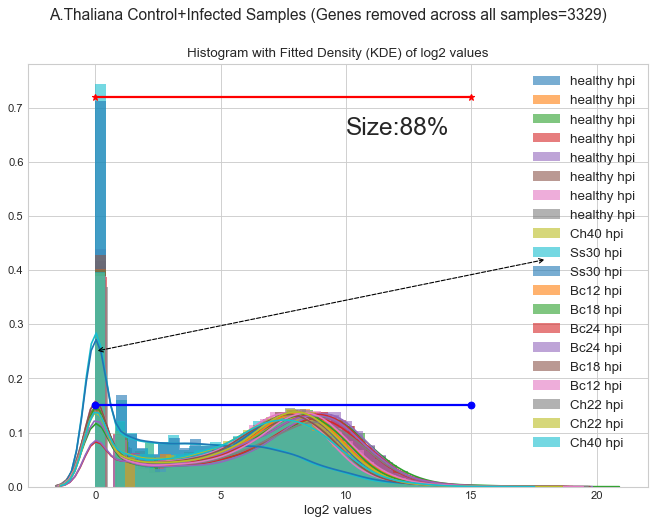

In [139]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    #print(file)  
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==file
    #print(is_sample)
    sample = df_meta[is_sample]
    #print(sample)
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
 
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of log2 values',fontsize=12);
plt.xlabel('log2 values',fontsize=12);
plt.suptitle("A.Thaliana Control+Infected Samples (Genes removed across all samples=3329)", fontsize=14)
## add arbitrary lines to canvas
plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
plt.plot([0, 15], [.72, .72], 'k-', lw=2, color='red',marker = '*')
plt.text(10, 0.65, "Size:88%",fontsize=22)
plt.annotate("", xy=(0,.25), xytext=(18,.42), arrowprops=dict(arrowstyle='<->',linestyle='--'))
plt.legend(fontsize=12);
#plt.savefig("../athal1_stats/all_fitted density_drop20zeros.png");

Once outliers have been identified, these should be analyzed separately and removed from the array if necessary. <br>
In this case these samples are: Ss30 <br>
First, let's to plot the samples with outliers.

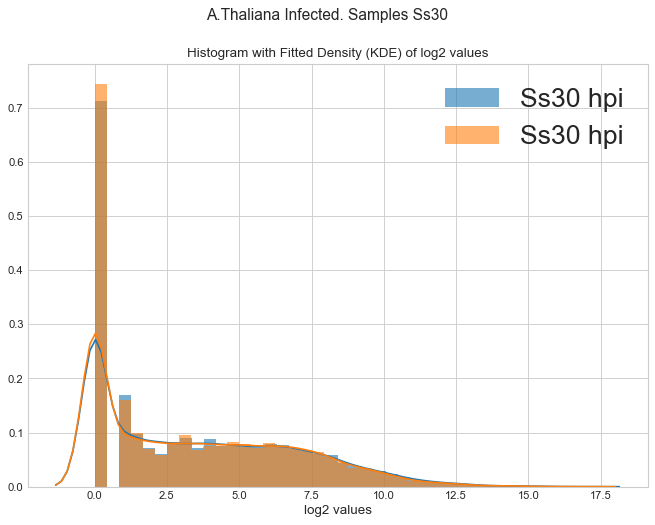

In [93]:
# Values are log2 normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
sample_lst2=['SRR6283147','SRR6283148']
for file in sample_lst2:
    #print(file)  
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==file
    #print(is_sample)
    sample = df_meta[is_sample]
    #print(sample)
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
 
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of log2 values',fontsize=12);
plt.xlabel('log2 values',fontsize=12);
plt.suptitle("A.Thaliana Infected. Samples Ss30", fontsize=14)
## add arbitrary lines to canvas
#plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
#plt.plot([0, 15], [.72, .72], 'k-', lw=2, color='red',marker = '*')
#plt.text(10, 0.6, "Size:88%",fontsize=24)
plt.legend(fontsize=24);
#plt.savefig("../athal1_stats/SRR_fitted density_drop20zeros.png");

If they behave very differently from the entire data set, delete them to avoid noise.<br>
In this case, I remove them from the array. 

In [68]:
# Load the data matrix (20 samples)
df_nozeros=pd.read_csv("all_log2_dropped20ceros.csv", sep='\t')
## remove unnamed cols
df_nozeros.drop(df_nozeros.columns[df_nozeros.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)

# Remove samples of the original matrix
df_nozeros.drop(['zero-counter','SRR6283147','SRR6283148'], axis = 1, inplace = True) 
print(df_nozeros.shape)
df_nozeros
df1.to_csv('all_log2_dropped20ceros_SRR.csv', sep='\t', index=True)

(24326, 19)


Now, I remove these samples from the sample list to plot again. <br>
Samples removed are Ss30, which did not pass nor the alignment QA Score neither the quantification threshold set.

In [69]:
#print(sample_lst.dtype)
len(sample_lst)
new_lst = list(sample_lst) 
new_lst
new_lst.remove('SRR6283148')
new_lst.remove('SRR6283147')
print(len(new_lst))
new_lst

18


['SRR3383640',
 'SRR3383821',
 'SRR3383782',
 'SRR6283145',
 'SRR3383641',
 'SRR3383783',
 'SRR3383822',
 'SRR6283144',
 'SRR364399',
 'SRR3383696',
 'SRR3383780',
 'SRR10586397pe',
 'SRR10586399pe',
 'SRR3383779',
 'SRR3383697',
 'SRR364390',
 'SRR364389',
 'SRR364398']

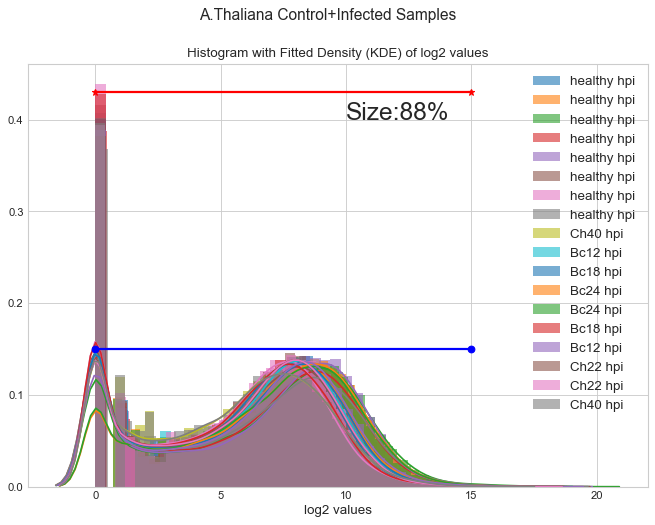

In [186]:

plt.figure(figsize=(10,7), dpi= 80)
for file in new_lst:  #sample_lst
    #print(file)  
    ## GET THE ID SAMPLE NAME
    is_sample =  df_meta['sample']==file
    #print(is_sample)
    sample = df_meta[is_sample]
    #print(sample)
    ID_sample = sample['ID'].values[0]
    #print(ID_sample)
 
    sample_data = df_nozeros[file].tolist()
    #print(sample_data)
    sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 

plt.title('Histogram with Fitted Density (KDE) of log2 values',fontsize=12);
plt.xlabel('log2 values',fontsize=12);
plt.suptitle("A.Thaliana Control+Infected Samples", fontsize=14)
## add arbitrary lines to canvas
plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
plt.plot([0, 15], [.43, .43], 'k-', lw=2, color='red',marker = '*')
plt.text(10, 0.4, "Size:88%",fontsize=22)
plt.legend(fontsize=12);
#plt.savefig("../athal1_stats/all_fitted density_dropSRR.png");